In [1]:
# Sys path
from sys import path
from pathlib import Path

module_path = str(Path.cwd().parents[1])

if module_path not in path:
    path.append(module_path)
    
path.append(module_path + '\\functions')


# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

import data_preparation, mrmr
from classification import LR, KNN, RF, XGB

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix

import time
import pickle

---------

# Datasets

In [2]:
# SLC
df_slc, X_slc, y_slc = data_preparation.load_dataset(module_path + '\\dataset\\single_attack_SLC.csv')
X_slc = X_slc.iloc[:,:-1]
X_slc.head()

,U1 - SCADA,U2 - SCADA,U3 - SCADA,U4 - SCADA,U5 - SCADA,U6 - SCADA,U7 - SCADA,U8 - SCADA,U9 - SCADA,U10 - SCADA,U11 - SCADA,U12 - SCADA,U13 - SCADA,U14 - SCADA,P2 - SCADA,P3 - SCADA,P4 - SCADA,P5 - SCADA,P6 - SCADA,P7 - SCADA,P8 - SCADA,P9 - SCADA,P10 - SCADA,P11 - SCADA,P12 - SCADA,P13 - SCADA,P14 - SCADA,Q2 - SCADA,Q3 - SCADA,Q4 - SCADA,Q5 - SCADA,Q6 - SCADA,Q7 - SCADA,Q8 - SCADA,Q9 - SCADA,Q10 - SCADA,Q11 - SCADA,Q12 - SCADA,Q13 - SCADA,Q14 - SCADA,U1 - EM - EKF,U2 - EM - EKF,U3 - EM - EKF,U4 - EM - EKF,U5 - EM - EKF,U6 - EM - EKF,U7 - EM - EKF,U8 - EM - EKF,U9 - EM - EKF,U10 - EM - EKF,U11 - EM - EKF,U12 - EM - EKF,U13 - EM - EKF,U14 - EM - EKF,P2 - EM - EKF,P3 - EM - EKF,P4 - EM - EKF,P5 - EM - EKF,P6 - EM - EKF,P7 - EM - EKF,P8 - EM - EKF,P9 - EM - EKF,P10 - EM - EKF,P11 - EM - EKF,P12 - EM - EKF,P13 - EM - EKF,P14 - EM - EKF,Q2 - EM - EKF,Q3 - EM - EKF,Q4 - EM - EKF,Q5 - EM - EKF,Q6 - EM - EKF,Q7 - EM - EKF,Q8 - EM - EKF,Q9 - EM - EKF,Q10 - EM - EKF,Q11 - EM - EKF,Q12 - EM - EKF,Q13 - EM - EKF,Q14 - EM - EKF,U1 - FM - EKF,U2 - FM - EKF,U3 - FM - EKF,U4 - FM - EKF,U5 - FM - EKF,U6 - FM - EKF,U7 - FM - EKF,U8 - FM - EKF,U9 - FM - EKF,U10 - FM - EKF,U11 - FM - EKF,U12 - FM - EKF,U13 - FM - EKF,U14 - FM - EKF,P2 - FM - EKF,P3 - FM - EKF,P4 - FM - EKF,P5 - FM - EKF,P6 - FM - EKF,P7 - FM - EKF,P8 - FM - EKF,P9 - FM - EKF,P10 - FM - EKF,P11 - FM - EKF,P12 - FM - EKF,P13 - FM - EKF,P14 - FM - EKF,Q2 - FM - EKF,Q3 - FM - EKF,Q4 - FM - EKF,Q5 - FM - EKF,Q6 - FM - EKF,Q7 - FM - EKF,Q8 - FM - EKF,Q9 - FM - EKF,Q10 - FM - EKF,Q11 - FM - EKF,Q12 - FM - EKF,Q13 - FM - EKF,Q14 - FM - EKF,U1 - ES - EKF,U2 - ES - EKF,U3 - ES - EKF,U4 - ES - EKF,U5 - ES - EKF,U6 - ES - EKF,U7 - ES - EKF,U8 - ES - EKF,U9 - ES - EKF,U10 - ES - EKF,U11 - ES - EKF,U12 - ES - EKF,U13 - ES - EKF,U14 - ES - EKF,ph2 - ES - EKF,ph3 - ES - EKF,ph4 - ES - EKF,ph5 - ES - EKF,ph6 - ES - EKF,ph7 - ES - EKF,ph8 - ES - EKF,ph9 - ES - EKF,ph10 - ES - EKF,ph11 - ES - EKF,ph12 - ES - EKF,ph13 - ES - EKF,ph14 - ES - EKF,U1 - FS - EKF,U2 - FS - EKF,U3 - FS - EKF,U4 - FS - EKF,U5 - FS - EKF,U6 - FS - EKF,U7 - FS - EKF,U8 - FS - EKF,U9 - FS - EKF,U10 - FS - EKF,U11 - FS - EKF,U12 - FS - EKF,U13 - FS - EKF,U14 - FS - EKF,ph2 - FS - EKF,ph3 - FS - EKF,ph4 - FS - EKF,ph5 - FS - EKF,ph6 - FS - EKF,ph7 - FS - EKF,ph8 - FS - EKF,ph9 - FS - EKF,ph10 - FS - EKF,ph11 - FS - EKF,ph12 - FS - EKF,ph13 - FS - EKF,ph14 - FS - EKF,U1 - NI,U2 - NI,U3 - NI,U4 - NI,U5 - NI,U6 - NI,U7 - NI,U8 - NI,U9 - NI,U10 - NI,U11 - NI,U12 - NI,U13 - NI,U14 - NI,P2 - NI,P3 - NI,P4 - NI,P5 - NI,P6 - NI,P7 - NI,P8 - NI,P9 - NI,P10 - NI,P11 - NI,P12 - NI,P13 - NI,P14 - NI,Q2 - NI,Q3 - NI,Q4 - NI,Q5 - NI,Q6 - NI,Q7 - NI,Q8 - NI,Q9 - NI,Q10 - NI,Q11 - NI,Q12 - NI,Q13 - NI,Q14 - NI
0,1.061465,1.046842,1.024400,1.022824,1.027417,1.058180,1.047996,1.041572,1.060025,1.049616,1.053586,1.047295,1.047978,1.031304,0.141641,-0.559956,-0.284531,-0.045360,-0.066822,2.280000e-10,8.080000e-08,-0.176049,-0.053473,-0.020871,-0.036271,-0.080640,-0.089247,0.053947,0.015329,0.023167,-0.009603,-0.105508,9.740000e-13,-0.031773,0.113328,-0.034573,-0.010734,-0.009585,-0.034482,-0.029669,1.059779,1.045352,1.022915,1.025002,1.025997,1.059706,1.050837,1.045485,1.056064,1.052282,1.053895,1.051244,1.048722,1.042220,0.140412,-0.562675,-0.287091,-0.045479,-0.067215,-0.000041,-0.000027,-0.176648,-0.053697,-0.020896,-0.036419,-0.080693,-0.089113,0.054291,0.015445,0.023306,-0.009585,-0.104688,0.000094,-0.031764,0.112807,-0.034613,-0.010752,-0.009521,-0.034545,-0.029881,1.059686,1.045070,1.022723,1.024937,1.025909,1.059697,1.051016,1.045982,1.056176,1.052363,1.053933,1.051246,1.048733,1.042318,0.120487,-0.562602,-0.285344,-0.045507,-0.066896,-0.000023,-0.000013,-0.176001,-0.053775,-0.020772,-0.036387,-0.080712,-0.088862,0.054951,0.015264,0.023353,-0.009579,-0.104702,0.000042,-0.029894,0.112977,-0.034733,-0.010802,-0.009519,-0.034607,-0.029802,1.059779,1.045352,1.022915,1.025002,1.025997,1.059706,1.050837,1.045485,1.056064,1.052282,1.053895,1.0512

In [4]:
X_slc.shape, y_slc.shape

((4840, 214), (4840,))

------------

# Data Analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

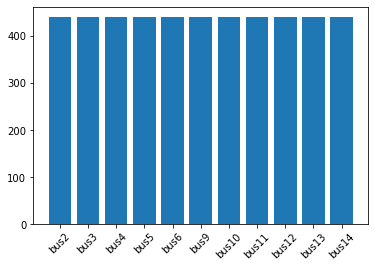

In [5]:
num = y_slc.value_counts()
num =list(np.array(num))
names = ['bus2', 'bus3', 'bus4', 'bus5', 'bus6', 'bus9', 'bus10', 'bus11', 'bus12', 'bus13', 'bus14']

plt.figure()
plt.bar(names, num)
plt.xticks(rotation=45)

--------------

# SLC ML models

### 1. All features

In [6]:
X_train, X_test, y_train, y_test = data_preparation.split_data(X_slc, y_slc, test_size=0.2, random_state=123)

train = 1

if train==1:
    # training
    train_LR = -time.time()
    LR(X_train, y_train, normalize=False, save_model='\\SE_bus_SLC\\classification_models\\lr_model.pickle', save_param='\\SE_bus_SLC\\classification_models\\lr_parametres.pickle')
    train_LR += time.time()
    print('LR')

    train_KNN = -time.time()
    KNN(X_train, y_train, normalize=False, save_model='\\SE_bus_SLC\\classification_models\\knn_model.pickle', save_param='\\SE_bus_SLC\\classification_models\\knn_parametres.pickle')
    train_KNN += time.time()
    print('KNN')

    train_RF = -time.time()
    RF(X_train, y_train, normalize=False, save_model='\\SE_bus_SLC\\classification_models\\rf_model.pickle', save_param='\\SE_bus_SLC\\classification_models\\rf_parametres.pickle')
    train_RF += time.time()
    print('RF')
    
    train_XGB = -time.time()
    XGB(X_train, y_train, normalize=False, save_model='\\SE_bus_SLC\\classification_models\\xgb_model.pickle', save_param='\\SE_bus_SLC\\classification_models\\xgb_parametres.pickle')
    train_XGB += time.time()
    print('XGB')
    
    train_time = data_preparation.to_dict(train_LR, train_KNN, train_RF, train_XGB)
    data_preparation.save_model(train_time, 'time/train_time')
    
train_time = data_preparation.load_model('time/train_time')
    
# load models
lr = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\lr_model.pickle', 'rb'))
knn = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\knn_model.pickle', 'rb'))
rf = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\rf_model.pickle', 'rb'))
xgb = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\xgb_model.pickle', 'rb'))
    
# load parameters
lr_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\lr_parametres.pickle', 'rb'))
knn_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\knn_parametres.pickle', 'rb'))
rf_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\rf_parametres.pickle', 'rb'))
xgb_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\xgb_parametres.pickle', 'rb'))
    
# prediction
test_LR = -time.time()
y_pred_lr = lr.predict(X_test)
test_LR += time.time()
    
test_KNN = -time.time()
y_pred_knn = knn.predict(X_test)
test_KNN += time.time()
    
test_RF = -time.time()
y_pred_rf = rf.predict(X_test)
test_RF += time.time()
    
test_XGB = -time.time()
y_pred_xgb = xgb.predict(X_test)
test_XGB += time.time()
       
# F1 score
macro_f1_lr = f1_score(y_test, y_pred_lr, average='macro')
macro_f1_knn = f1_score(y_test, y_pred_knn, average='macro')
macro_f1_rf = f1_score(y_test, y_pred_rf, average='macro')
macro_f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

LR
KNN
RF
XGB


In [8]:
print('##############')
print('F1 score:')
print('LR', macro_f1_lr*100) 
print('KNN', macro_f1_knn*100)
print('RF', macro_f1_rf*100)
print('XGB', macro_f1_xgb*100)

print('##############')
print('Training Time:')
print('LR', train_time['LR'], 'sec')
print('KNN', train_time['KNN'], 'sec')
print('RF', train_time['RF'], 'sec')
print('XGB', train_time['XGB'], 'sec')

print('##############')
print('Testing Time:')
print('LR', test_LR, 'sec')
print('KNN', test_KNN, 'sec')
print('RF', test_RF, 'sec')
print('XGB', test_XGB, 'sec')

print('##############')
print('Parameters:')
print('LR:', lr_param)
print('KNN:', knn_param)
print('RF:', rf_param)
print('XGB:', xgb_param)

##############
F1 score:
LR 99.79338175948345
KNN 96.39154585244516
RF 100.0
XGB 100.0
##############
Training Time:
LR 327.460533618927 sec
KNN 13.72983455657959 sec
RF 467.1678111553192 sec
XGB 2912.465294599533 sec
##############
Testing Time:
LR 0.00999903678894043 sec
KNN 0.12500238418579102 sec
RF 0.34700584411621094 sec
XGB 0.211012601852417 sec
##############
Parameters:
LR: ['newton-cg', 'none', 6.028030997340369]
KNN: [3, 'distance']
RF: [734, 8, 3, 6]
XGB: [734, 8, 0.341033659841376, 0.9062277773751638, 0.8995352601864789]


------------

# MRMR

In [9]:
selected_features_slc = mrmr.mrmr_classif(X_slc, y_slc, K = 100 , relevance = 'mi', redundancy = 'spearman', denominator = 'mean')

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 377.39it/s]


### 2. Best N features

In [17]:
N = 40
best_features = selected_features_slc[:N]
best_features

['P2 - NI',
 'P2 - EM - EKF',
 'P8 - EM - EKF',
 'P2 - SCADA',
 'P7 - EM - EKF',
 'Q9 - NI',
 'P4 - EM - EKF',
 'Q4 - EM - EKF',
 'Q3 - NI',
 'P6 - EM - EKF',
 'U12 - ES - EKF',
 'U12 - EM - EKF',
 'U10 - EM - EKF',
 'U10 - ES - EKF',
 'U6 - ES - EKF',
 'U6 - EM - EKF',
 'U13 - EM - EKF',
 'U13 - ES - EKF',
 'P9 - EM - EKF',
 'U11 - ES - EKF',
 'U11 - EM - EKF',
 'P12 - EM - EKF',
 'P5 - EM - EKF',
 'U9 - EM - EKF',
 'U9 - ES - EKF',
 'Q5 - EM - EKF',
 'P10 - EM - EKF',
 'U14 - EM - EKF',
 'U14 - ES - EKF',
 'P9 - SCADA',
 'P3 - EM - EKF',
 'P13 - SCADA',
 'Q14 - SCADA',
 'P10 - SCADA',
 'Q10 - SCADA',
 'P5 - SCADA',
 'P11 - SCADA',
 'P13 - EM - EKF',
 'P12 - SCADA',
 'Q11 - SCADA']

In [18]:
X_best = X_slc.loc[:, best_features] 
X_train, X_test, y_train, y_test = data_preparation.split_data(X_best, y_slc, test_size=0.2, random_state=123)

train = 1

if train==1:
    train_LR = -time.time()
    LR(X_train, y_train, normalize=False, save_model='\\SE_bus_SLC\\classification_models\\lr_model_mrmr.pickle', save_param='\\SE_bus_SLC\\classification_models\\lr_parametres_mrmr.pickle')
    train_LR += time.time()
    print('LR')

    train_KNN = -time.time()
    KNN(X_train, y_train, normalize=False, save_model='\\SE_bus_SLC\\classification_models\\knn_model_mrmr.pickle', save_param='\\SE_bus_SLC\\classification_models\\knn_parametres_mrmr.pickle')
    train_KNN += time.time()
    print('KNN')

    train_RF = -time.time()
    RF(X_train, y_train, normalize=False, save_model='\\SE_bus_SLC\\classification_models\\rf_model_mrmr.pickle', save_param='\\SE_bus_SLC\\classification_models\\rf_parametres_mrmr.pickle')
    train_RF += time.time()
    print('RF')

    train_XGB = -time.time()
    XGB(X_train, y_train, normalize=False, save_model='\\SE_bus_SLC\\classification_models\\xgb_model_mrmr.pickle', save_param='\\SE_bus_SLC\\classification_models\\xgb_parametres_mrmr.pickle')
    train_XGB += time.time()
    print('XGB')
    
    train_time = data_preparation.to_dict(train_LR, train_KNN, train_RF, train_XGB)
    data_preparation.save_model(train_time, 'time/train_time_mrmr')


train_time = data_preparation.load_model('time/train_time_mrmr')

# load models
lr = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\lr_model_mrmr.pickle', 'rb'))
knn = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\knn_model_mrmr.pickle', 'rb'))
rf = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\rf_model_mrmr.pickle', 'rb'))
xgb = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\xgb_model_mrmr.pickle', 'rb'))

# load parameters
lr_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\lr_parametres_mrmr.pickle', 'rb'))
knn_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\knn_parametres_mrmr.pickle', 'rb'))
rf_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\rf_parametres_mrmr.pickle', 'rb'))
xgb_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_SLC\\classification_models\\xgb_parametres_mrmr.pickle', 'rb'))


# prediction
test_LR = -time.time()
y_pred_lr = lr.predict(X_test)
test_LR += time.time()

test_KNN = -time.time()
y_pred_knn = knn.predict(X_test)
test_KNN += time.time()

test_RF = -time.time()
y_pred_rf = rf.predict(X_test)
test_RF += time.time()

test_XGB = -time.time()
y_pred_xgb = xgb.predict(X_test)
test_XGB += time.time()

# F1 score
macro_f1_lr = f1_score(y_test, y_pred_lr, average='macro')
macro_f1_knn = f1_score(y_test, y_pred_knn, average='macro')
macro_f1_rf = f1_score(y_test, y_pred_rf, average='macro')
macro_f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

LR
KNN
RF
XGB


In [20]:
print('##############')
print('F1 score:')
print('LR', macro_f1_lr*100) 
print('KNN', macro_f1_knn*100)
print('RF', macro_f1_rf*100)
print('XGB', macro_f1_xgb*100)

print('##############')
print('Training Time:')
print('LR', train_time['LR'], 'sec')
print('KNN', train_time['KNN'], 'sec')
print('RF', train_time['RF'], 'sec')
print('XGB', train_time['XGB'], 'sec')

print('##############')
print('Testing Time:')
print('LR', test_LR, 'sec')
print('KNN', test_KNN, 'sec')
print('RF', test_RF, 'sec')
print('XGB', test_XGB, 'sec')

print('##############')
print('Parameters:')
print('LR:', lr_param)
print('KNN:', knn_param)
print('RF:', rf_param)
print('XGB:', xgb_param)

##############
F1 score:
LR 98.97340081955466
KNN 61.48656808404852
RF 100.0
XGB 100.0
##############
Training Time:
LR 268.0855441093445 sec
KNN 12.536566019058228 sec
RF 228.42636394500732 sec
XGB 705.549417257309 sec
##############
Testing Time:
LR 0.0029993057250976562 sec
KNN 0.12798047065734863 sec
RF 0.33408093452453613 sec
XGB 0.20993947982788086 sec
##############
Parameters:
LR: ['newton-cg', 'none', 6.028030997340369]
KNN: [17, 'distance']
RF: [734, 8, 3, 6]
XGB: [734, 8, 0.341033659841376, 0.9062277773751638, 0.8995352601864789]
